# Keshari Nath Chaudhary

### Introduction: A description of the problem and a discussion of the background

1. In Module 3, we explored New York City and the city of Toronto and segmented and clustered their neighborhoods. Both cities are very diverse and are the financial capitals of their respective countries.
2. One interesting idea would be to compare the neighborhoods of the two cities and determine how similar or dissimilar they are.
3. In this assignment we will compare the neighborhoods of the two indian cities namely Hyderabad and Mumbai
4. Is Hyderabad more like Toronto or Mumbai or some other multicultural city?
5. In Hyderabad, if someone is looking to open a restaurant, where would we recommend that they open it? Similarly, if a contractor is trying to start their own business, where would you recommend that they setup their office? and other important points will be discussed

### Extracting the data

List of Cafes and foodstalls of Hyderabad with their lattitude and longitude,
List of Hotels, Book stores,Restaurant, Bakaries, and all relavant locations,
All data is limited with in 10km radius

In [1]:
import json 
import requests 
from pandas.io.json import json_normalize 
import numpy as np 
import time
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 
!conda install -c conda-forge folium=0.5.0 --yes
import folium 
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


### Extracting the geograpical coordinates of Hyderabad through geolocator

In [8]:
address = 'Hyderabad,HYD'
geolocator = Nominatim(user_agent="HYD_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of' ,address,'are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Hyderabad,HYD are 17.3140928, 78.4745688.


In [9]:
neighborhood_latitude=latitude
neighborhood_longitude=longitude

### Using Foursquare credentials to analyse the neighbourhood in Hyderabad

In [10]:
CLIENT_ID = 'W0TOR4YGZ3KRYLETUOX2SBBLAAAXOCQECJ31DGYWWEE5PYSO'
CLIENT_SECRET = 'EVNNFIUBUFIANIFDQ2P5KD2WN4J0WNS54VJCYO3Y0VENKDZ5' # your Foursquare Secret
VERSION = '20180604' #your version

In [11]:
radius = 10000
limit = 200 
# importing the data with URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius,
    limit)
results = requests.get(url).json()

### Determining the catogories of each location in data

In [12]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Showing the list of venues

In [13]:
venues = results['response']['groups'][0]['items']
    
HYD_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
HYD_venues =HYD_venues.loc[:, filtered_columns]
# filter the category for each row
HYD_venues['venue.categories'] = HYD_venues.apply(get_category_type, axis=1)
# clean columns
HYD_venues.columns = [col.split(".")[-1] for col in HYD_venues.columns]
HYD_venues.head(100)

<ipython-input-13-9c66c6406e1f>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  HYD_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,Taj Falaknuma Palace,Resort,17.330118,78.467460
1,Hotel Shah Ghouse,Snack Place,17.347899,78.470986
2,Chowmahala Palace,History Museum,17.359300,78.471617
3,Shadaab,Diner,17.368661,78.475572
4,Pista house,Indian Restaurant,17.356609,78.473637
5,Swagath Tiffins,Vegetarian / Vegan Restaurant,17.344639,78.508231
6,Jade Terrace,Breakfast Spot,17.330542,78.467510
7,Charminar,Monument / Landmark,17.361555,78.474677
8,Laxman Ki Bandi,South Indian Restaurant,17.378895,78.463973
9,Decathlon Sports Store,Sporting Goods Shop,17.242370,78.434798


In [14]:
HYD_venues.shape

(100, 4)

### Creating Hyderabad map with Folium

In [15]:
MAP_HYD = folium.Map(location=[latitude, longitude], zoom_start=12)
# add markers to map
for lat, lng, label in zip(HYD_venues['lat'], HYD_venues['lng'], HYD_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill_color='#3186cc',
        fill_opacity=0.7,
    ).add_to(MAP_HYD)  
MAP_HYD

In [17]:
from folium import plugins
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
print('libraries imported.')

libraries imported.


### Extracting the data of Mumbai

In this case also the data extracted may include:

1. List of Cafes and foodstalls of Mumbai with their lattitude and longitude
2. List of Hotels, Book stores,Restaurant, Bakaries, and all relavant locations
3. All data is limited with in 10km radius

In [18]:
address = 'Mumbai,MH'
geolocator = Nominatim(user_agent="mum_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of' ,address,'are {}, {}.'.format(latitude, longitude))
neighborhood_latitude=latitude
neighborhood_longitude=longitude

The geograpical coordinates of Mumbai,MH are 19.0759899, 72.8773928.


In [19]:
radius = 20000
limit = 200 
# importing the data with URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius,
    limit)
results = requests.get(url).json()

### Determining the catogories of each location in data & Showing the list of venues

In [20]:
venues = results['response']['groups'][0]['items']
    
MB_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
MB_venues =MB_venues.loc[:, filtered_columns]
# filter the category for each row
MB_venues['venue.categories'] = MB_venues.apply(get_category_type, axis=1)
# clean columns
MB_venues.columns = [col.split(".")[-1] for col in MB_venues.columns]
MB_venues.head(100)

<ipython-input-20-e33b0539efc3>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  MB_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,Hitchki,Bar,19.069730,72.869761
1,Starbucks Coffee Capital,Coffee Shop,19.063457,72.861576
2,Sofitel Mumbai BKC,Hotel,19.067448,72.869006
3,Hamleys,Toy / Game Store,19.086655,72.889783
4,MCA Club,Gym Pool,19.060443,72.866020
5,Trident,Hotel,19.066808,72.867468
6,Yauatcha,Dim Sum Restaurant,19.061370,72.862680
7,IVY Restaurant & Banquets,Restaurant,19.069663,72.900535
8,JW Marriott Mumbai Sahar,Hotel,19.102502,72.878236
9,Peshawari,Indian Restaurant,19.103954,72.869879


### Creating Mumbai map with Folium

In [21]:
MAP_MB = folium.Map(location=[latitude, longitude], zoom_start=12)
# add markers to map
for lat, lng, label in zip(MB_venues['lat'], MB_venues['lng'], MB_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill_color='#3186cc',
        fill_opacity=0.7,
    ).add_to(MAP_MB)  
MAP_MB

### Value count of HYDERABAD

In [23]:
HYD_count = HYD_venues['categories'].value_counts()
MB_count = MB_venues['categories'].value_counts()
print(">>>>>>HYDERABAD<<<<<<")
print(HYD_count)

>>>>>>HYDERABAD<<<<<<
Indian Restaurant                12
Café                              6
Pizza Place                       5
Fast Food Restaurant              5
Bakery                            4
South Indian Restaurant           3
History Museum                    3
Taxi Stand                        3
Juice Bar                         3
Diner                             3
Breakfast Spot                    3
Movie Theater                     3
Multiplex                         2
Food Court                        2
Shopping Mall                     2
Coffee Shop                       2
Restaurant                        2
Middle Eastern Restaurant         2
Vegetarian / Vegan Restaurant     2
Snack Place                       2
Hotel                             2
Hookah Bar                        1
Hyderabadi Restaurant             1
Dessert Shop                      1
Sporting Goods Shop               1
Ice Cream Shop                    1
Resort                            1
Italia

### Value count of MUMBAI

In [24]:
print("")
print("MUMBAI")
print(MB_count)


MUMBAI
Indian Restaurant                13
Hotel                             9
Coffee Shop                       7
Café                              5
Dessert Shop                      4
Seafood Restaurant                4
Scenic Lookout                    3
Bakery                            3
Deli / Bodega                     3
Bar                               3
Italian Restaurant                2
Salad Place                       2
Brewery                           2
Juice Bar                         2
Pizza Place                       2
Lounge                            2
Restaurant                        2
Shopping Mall                     2
Fast Food Restaurant              2
Diner                             1
Theater                           1
North Indian Restaurant           1
General Entertainment             1
Food Truck                        1
Snack Place                       1
American Restaurant               1
Pub                               1
Ice Cream Shop      

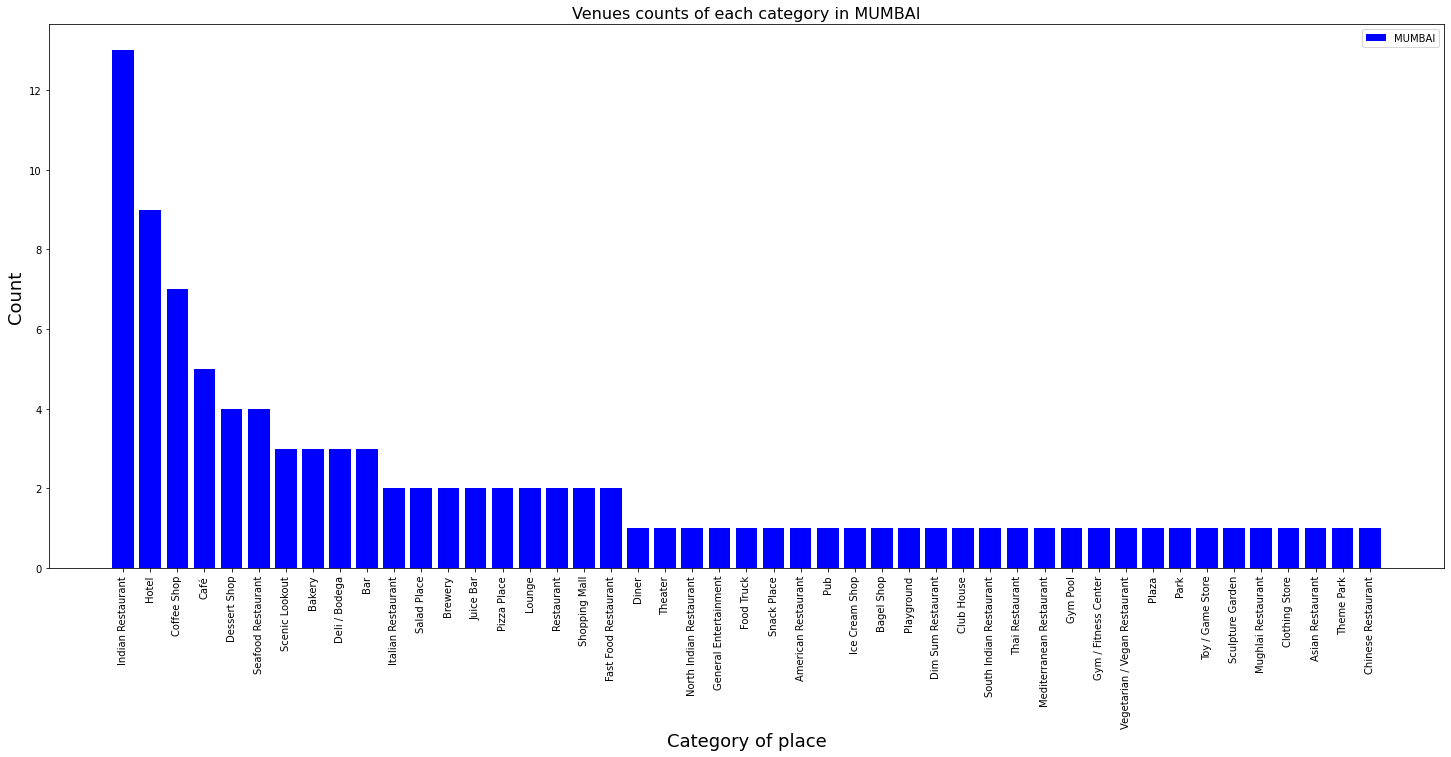

In [26]:
import matplotlib.pyplot as plt
MB_count = MB_venues['categories'].value_counts()
plt.figure(figsize = (25, 10))
plt.xticks(rotation = 90)
plt.xlabel("Category of place", fontsize = 18)
plt.ylabel("Count", fontsize = 18)
plt.title("Venues counts of each category in MUMBAI", fontsize = 16)
plt.bar(MB_count.index, MB_count.values,color='blue')
plt.legend(["MUMBAI"])

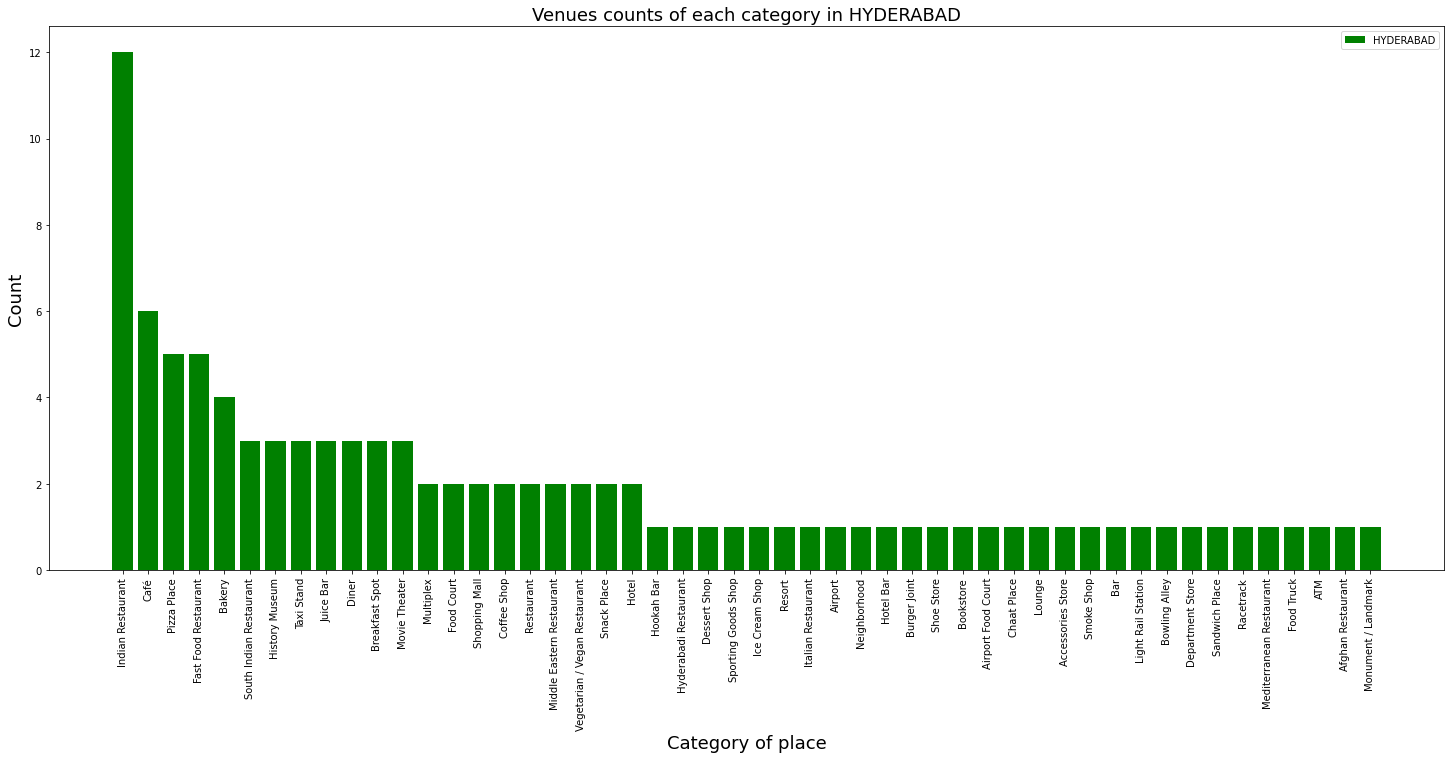

In [27]:
plt.figure(figsize = (25, 10))
plt.xticks(rotation = 90)
plt.xlabel("Category of place", fontsize = 18)
plt.ylabel("Count", fontsize = 18)
plt.title("Venues counts of each category in HYDERABAD", fontsize = 18)
plt.bar(HYD_count.index, HYD_count.values, color='green')
plt.legend(["HYDERABAD"])

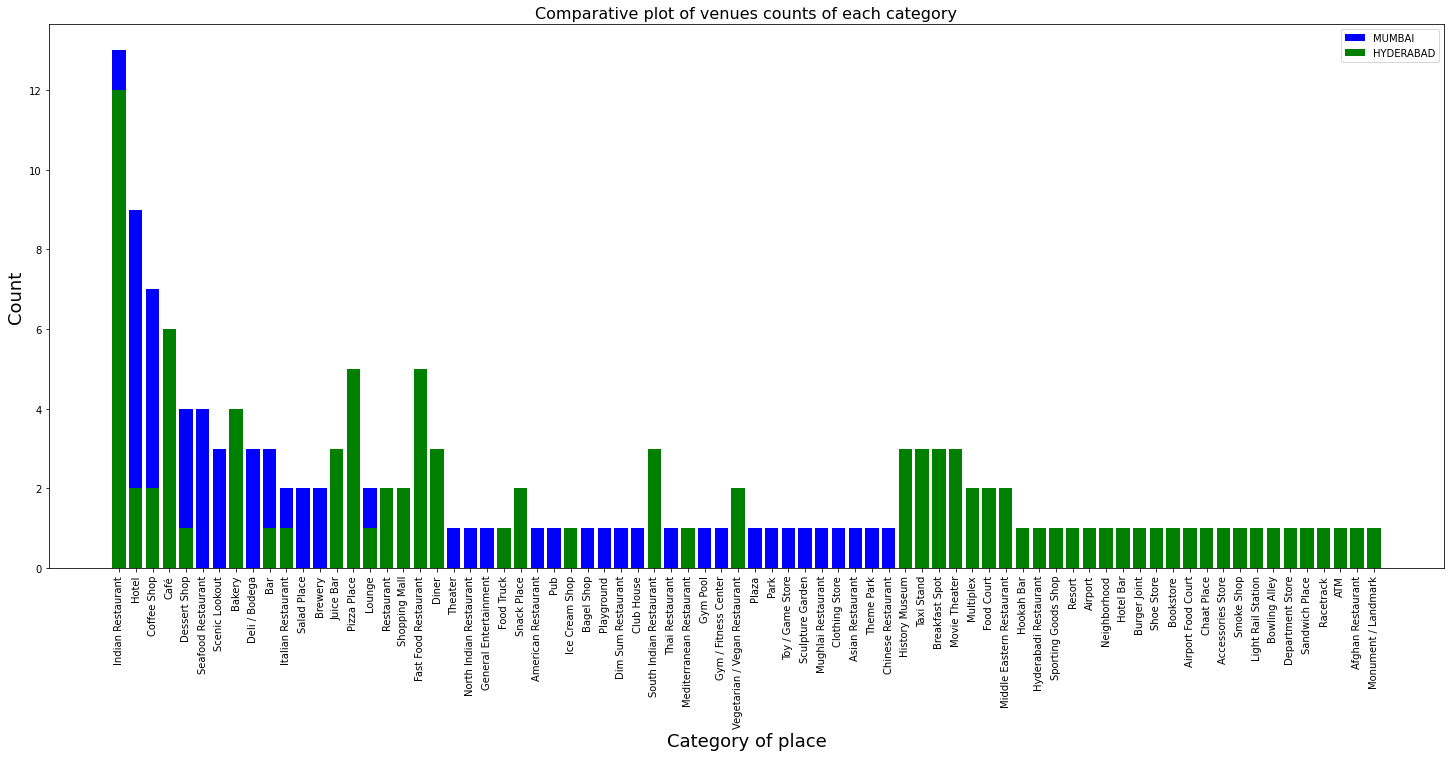

In [28]:
plt.figure(figsize = (25, 10))
plt.xticks(rotation = 90)
plt.xlabel("Category of place", fontsize = 18)
plt.ylabel("Count", fontsize = 18)
plt.title("Comparative plot of venues counts of each category", fontsize = 16)
plt.bar(MB_count.index, MB_count.values,color='blue')
plt.bar(HYD_count.index, HYD_count.values, color='green')
plt.legend(["MUMBAI","HYDERABAD"])

### 4.Observations & Discussion

1. From above bar graph, we can observe that bothe HYDERABAD and MUMBAI are similar in tersm of Shops, Restaurants , Cafes etc.
2. However, the Mumbai is more versatile in terms of venues compare to Hyderabad.
3. In Mumbai,when we observe the Folium map created with the help of Foursquare credentials, more venues are clustered in "Bandra West & Juhu" area and less venues can be spotted in " Vidya Vihar " area.
4. In Hyderabad,up on similar observation, more venues are clustered in "Abids, Ameetpet & Panjagutta" area and less venues can be spotted in " Golkonda " area.
5. Mumbai has significantly more number of Indian restaurants, Hotels, Coffe shops, lounges.
6. On other hand, Hyderabad has more number of Bakeries tha Mumbai
7. In terms of Shopping malls, Chinese restaurants, Asian restaurants, Ice cream shops, Juice bar both Mumbai and Hyderabad are more similar.
8. Rest miscellaneous venues are found to be single or two for both Mumbaib and Hyderabad.

### 5.Conclusion

1. From above observations we can conclude the following things:
2.In Mumbai, if some one wants to open a restautant, one can prefer "Bandra West or Juhu" area similarly in Hyderabad one can prefer "Abids or Ameerpet" area.
3.Opening Indian restaurant or Hotel in Hyderabad will be comparatively better than Mumbai because Mumbai already has a significantly more number of this category venues than Hyderabad.
4.One can always preferr starting up a miscellenius type of venues as they were low and easy entry to the market in both Mumbai and Hyderabad
5.On overall, if a person wants to shift from Hyderabad to Mumbai or vice versa , there wouldn't be any problems as both cities are more similar in terms of venues according to Foursquare API data.